# 读入数据代码简析

## 1.函数解析
###  源代码自上而下

* Python：插值interpolate模块：<br>
  * 插值是离散函数逼近的重要方法，利用它可通过函数在有限个点处的取值状况，估算出函数在其他点处的近似值。与拟合不同的是，要求曲线通过所有的已知数据。SciPy的interpolate模块提供了许多对数据进行插值运算的函数，范围涵盖简单的一维插值到复杂多维插值求解。当样本数据变化归因于一个独立的变量时，就使用一维插值；反之样本数据归因于多个独立变量时，使用多维插值。<br>
  * 计算插值有两种基本的方法，1、对一个完整的数据集去拟合一个函数；2、对数据集的不同部分拟合出不同的函数，而函数之间的曲线平滑对接。第二种方法又叫做仿样内插法，当数据拟合函数形式非常复杂时，这是一种非常强大的工具。我们首先介绍怎样对简单函数进行一维插值运算，然后进一步深入比较复杂的多维插值运算。<br>
转载：https://zhuanlan.zhihu.com/p/136700122

* 警告异常处理;pandas.options.mode.chained_assignment<br>
  * None，忽略警告<br>
  * "warn"，打印警告消息<br>
  * "raise"，引发异常<br>
more:https://www.codenong.com/47182183/

In [ ]:
class Config():
  seed = 100
  use_seed = False
  n_channel = 3
  n_class = 3
  num_repeat_noise = 1
  sampling_rate = 100
  dt = 1.0/sampling_rate
  X_shape = [3000, 1, n_channel]
  Y_shape = [3000, 1, n_class]
  min_event_gap = 3 * sampling_rate


## ①定义第一个类：

* 定义类：默认配值
  * （1）random.seed( ) 用于指定生成随机数时所用算法的初始值。<br>
     1.如果使用相同的seed( )值，则每次生成的随机数都相同；<br>
     2.如果不设置这个值，则系统根据时间来自己选择这个值。此时每次生成的随机数因时间差异而不同。<br>
     3.设置的seed()值仅一次有效.<br>
  * （2）通道=3：地震数据三分量。
  * （3）类别：P\S\Noise;
  * （4）采样率：100Hz
  * （5）时间间隔：0.01s
  * （6）输入数据：3001
  * （7）最小事件：300Hz??

In [1]:
class DataReader(object)

## ②定义第二个类：

* 定义类：读入数据
  * （1） pd.read_csv('data.csv',encoding = "utf-8",header = 0,names = range(0,50),index_col=0)<br>
    header = 0是默认情况（即不标明，默认就是header = 0），表示以数据的第一行为列索引；<br>
    encoding = "utf-8"表明以utf-8为编码规则；<br>
    names = range(0,50))表示以[0....49]为列索引的名字；<br>
    index_col=0表示以原有数据的第一列(索引为0)当作行索引。<br>
  * （2）buffer:缓冲区
  * （3）tf.FIFOQueue：FIFOQueue类基于基类QueueBase．QueueBase主要包含入列（enqueue）和出列（dequeue）两个操作．enqueue操作返回计算图中的一个Operation节点，dequeue操作返回一个Tensor值．Tensor在创建时同样只是一个定义，需要放在Session中运行才能获得真正的数值。<br>
    * tensorflow使用tf.FIFOQueue类创建一个先入先出队列．<br>
      属性：<br>
      capacity：指定队列中的元素数量的上限。<br>
      dtypes：DType对象的列表。dtypes的长度必须等于每个队列元素中张量的数量。<br>
      shapes：（可选项）<br>
      names:(可选项）命名队列的字符串。<br>
      shared_name :(可选项）如果非空，则将在多个会话中以给定名称共享此队列。<br>
      name：队列操作的可选名称。<br>
    转载：https://blog.csdn.net/akadiao/article/details/78552037

In [ ]:
def add_placeholder(self):

* 定义占位符

In [ ]:
def dequeue(self, num_elements):

* 定义出列
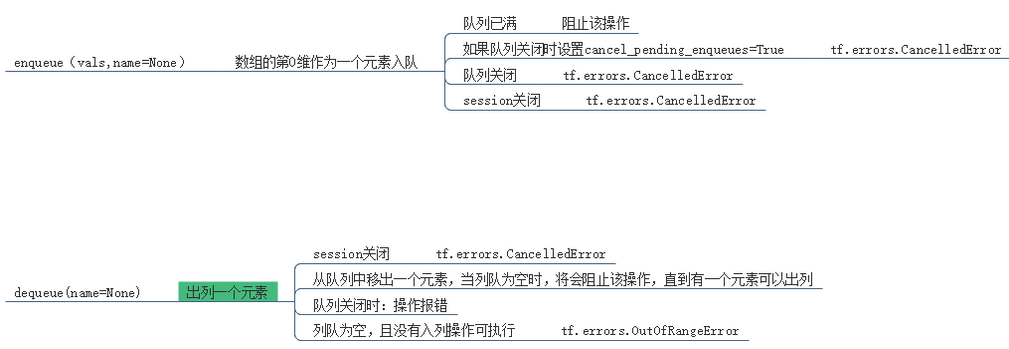
FIFOQueue.enqueue():单个数据元素入队<br>
FIFOQueue.enqueue_many():多个元素批量入队<br>
FIFOQueue.dequeue():单个数据元素出队<br>
FIFOQueue.dequeue_many():多个元素批量入队<br>
转载：https://blog.csdn.net/qq_31150463/article/details/88557169

In [ ]:
def normalize(self, data):

* 定义标准化函数：求均值--求方差-axis=0代表对列求解--标准化
  * mean() 函数定义：numpy.mean(a, axis, dtype, out，keepdims ):求取均值。
    以m * n矩阵举例：<br>
    * axis 不设置值，对 m*n 个数求均值，返回一个实数<br>
    * axis = 0：压缩行，对各列求均值，返回 1* n 矩阵<br>
    * axis =1 ：压缩列，对各行求均值，返回 m *1 矩阵<br>
    转载：http://blog.csdn.net/taotiezhengfeng/article/details/72397282
  * numpy.std(a, axis=None, dtype=None, out=None, ddof=0)：计算沿指定轴的标准差。返回数组元素的标准差。
    * a： array_like，需计算标准差的数组
    * axis： int, 可选，计算标准差的轴。默认情况是计算扁平数组的标准偏差。
    * dtype： dtype, 可选，用于计算标准差的类型。对于整数类型的数组，缺省值为Float 64，对于浮点数类型的数组，它与数组类型相同。
    * out： ndarray, 可选，将结果放置在其中的替代输出数组。它必须具有与预期输出相同的形状，但如果有必要，类型(计算值的类型)将被转换。
    * ddof： int, 可选，Delta的自由度
  * assert基本用法：检查条件，不符合就终止程序。
  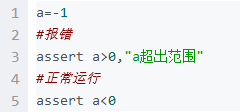

In [ ]:
def adjust_missingchannels(self, data)

* np.max()一般只用来做轴操作;np.maximum()一般用于直接求最值，不推荐做轴操作(涉及维度的 broadcast 机制)<br>
  more example:https://blog.csdn.net/z13653662052/article/details/103011300
* numpy.count_nonzero(a, axis=None, *, keepdims=False)：是用于统计数组中非零元素的个数。<br>
  a: 为需要统计数组名<br>
  axis: 为统计的轴,当axis=0时统计数组y轴（每列） 非零元素个数，当axis=1时统计数组每 x轴(每行) 非零元素个数, 另外，axis可以为元组<br>

In [ ]:
 def thread_main(self, sess, n_threads=1, start=0):

 * main_thread()是Python中线程模块的内置方法。 它用于返回主线程对象。 在正常情况下，这是Python解释程序从其启动的线程。<br>
   转载： https://blog.csdn.net/cumt951045/article/details/107766753<br>
 * Python  range() 函数返回的是一个可迭代对象（类型是对象），而不是列表类型， 所以打印的时候不会打印列表。<br>
   * 函数语法：<br>
     range(stop)<br>
     range(start, stop ，step)//默认start为0，step为1<br>
 * list() 函数是对象迭代器，可以把range()返回的可迭代对象转为一个列表，返回的变量类型为列表。<br>
   * list() 方法用于将元组转换为列表。<br>
     注：元组与列表是非常类似的，区别在于元组的元素值不能修改，元组是放在括号中( )，列表是放于方括号中[ ]。<br>
      元组：tuple 英 /tjʊpəl; ˈtʌpəl/ 美 /ˈtjʊpəl; ˈtʌpəl/ <br>
 转载：https://www.cnblogs.com/foremostxl/p/9374771.html
 * numpy.ndarray.tolist()的用法：Numpy 中 tolist()用于将数组或矩阵转为列表。<br>
 转载：https://blog.csdn.net/qq_41800366/article/details/87875472
 * tf.Coordinator： Coordinator类用来帮助多个线程协同工作，多个线程同步终止。 
   * 其主要方法有：<br>
    should_stop():如果线程应该停止则返回True。<br>
    request_stop(): 请求该线程停止。<br>
    join():等待被指定的线程终止。<br>
   * 首先创建一个Coordinator对象，然后建立一些使用Coordinator对象的线程。这些线程通常一直循环运行，一直到should_stop()返回True时停止。 任何线程都可以决定计算什么时候应该停止。它只需要调用request_stop()，同时其他线程的should_stop()将会返回True，然后都停下来。
   * 举例：同步执行队列：<br>
   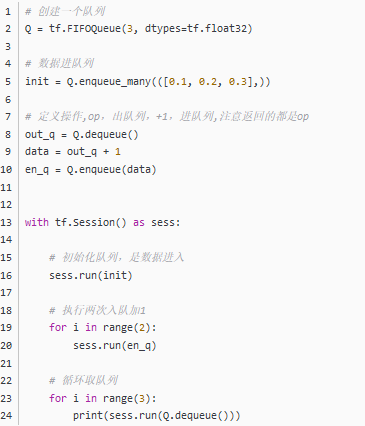
   异步执行队列：
   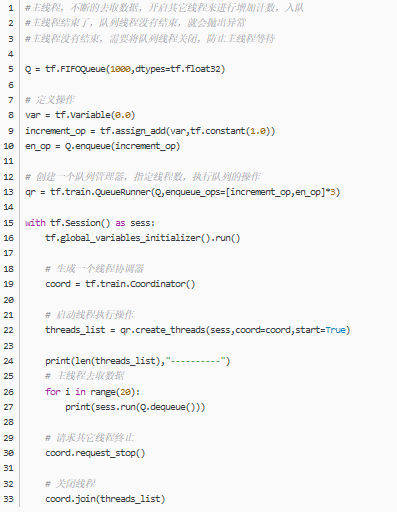
  转载：https://blog.csdn.net/xun527/article/details/79699167

* metaclass (元类)就是用来创建类的类，是python 里面的编程魔法。<br>
深入理解：https://blog.csdn.net/psh2009/article/details/10330747<br>
* numpy.random.randint(low, high=None, size=None, dtype='l')：返回一个随机整型数，范围从低（包括）到高（不包括），即[low, high)。
如果没有写参数high的值，则返回[0,low)的值。<br>
 * 参数如下：<br>
    low: （int）生成的数值最低要大于等于low。（hign = None时，生成的数值要在[0, low)区间内）<br>
    high: int (可选)如果使用这个值，则生成的数值在[low, high)区间。<br>
    size: int or tuple of ints(可选)输出随机数的尺寸，比如size = (m * n* k)则输出同规模即m * n* k个随机数。默认是None的，仅仅返回满足要求的单一随机数。<br>
    dtype: dtype(可选)：想要输出的格式。如int64、int等等<br>
 * 输出：out: int or ndarray of ints，返回一个随机数或随机数数组<br>
 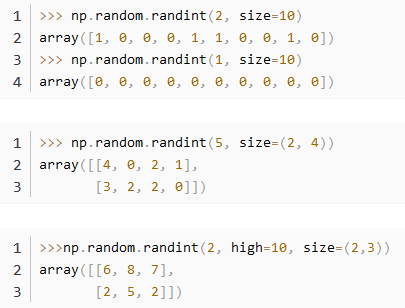
 转载：https://blog.csdn.net/u011851421/article/details/83544853

* numpy isinf（）函数用于按元素测试正无穷或负无穷大。返回与x形状相同的布尔数组，如果x == +/- inf，则返回True，否则返回False

In [ ]:
def start_threads(self, sess, n_threads=8):

* 定义开始线程函数<br>
  * Python多线程编程中daemon属性的作用：<br>
    在脚本运行过程中有一个主线程，若在主线程中创建了子线程，当主线程结束时根据子线程daemon属性值的不同可能会发生下面的两种情况之一：<br>
    * 如果某个子线程的daemon属性为False，主线程结束时会检测该子线程是否结束，如果该子线程还在运行，则主线程会等待它完成后再退出；<br>
    * 如果某个子线程的daemon属性为True，主线程运行结束时不对这个子线程进行检查而直接退出，同时所有daemon值为True的子线程将随主线程一起结束，而不论是否运行完成。<br>
    * 属性daemon的值默认为False，如果需要修改，必须在调用start()方法启动线程之前进行设置。另外要注意的是，上面的描述并不适用于IDLE环境中的交互模式或脚本运行模式，因为在该环境中的主线程只有在退出Python IDLE时才终止。<br>
    转载：https://blog.csdn.net/dongfuguo/article/details/53899426

In [ ]:
class DataReader_test(DataReader):

## ③定义第三个类：

* 定义数据读入测试类

* Numpy.random.seed()：设置seed（）里的数字就相当于设置了一个盛有随机数的“聚宝盆”，一个数字代表一个“聚宝盆”，当我们在seed（）的括号里设置相同的seed，“聚宝盆”就是一样的，那当然每次拿出的随机数就会相同（不要觉得就是从里面随机取数字，只要设置的seed相同取出地随机数就一样）。如果不设置seed，则每次会生成不同的随机数。（注：seed括号里的数值基本可以随便设置哦）<br>
转载：https://blog.csdn.net/weixin_41571493/article/details/80549833

In [ ]:
class DataReader_pred(DataReader):

## ④定义第四个类：

* 定义数据读入预测类

In [ ]:
class DataReader_mseed(DataReader):

## ⑤定义第五个类：
* 定义数据读入mseed文件？？

* obspy.read：ObsPy中read函数读入地震数据。
* detrend：scipy.signal.detrend(data, axis=-1, type='linear', bp=0, overwrite_data=False)：从数据中删除沿轴的线性趋势。
转载：https://vimsky.com/examples/usage/python-scipy.signal.detrend.html
* merge函数：使用merge合并时，两个数据集的合并条件是类型须一致。默认是内连接，也可以按照需求选择outer，left，right等外连接方式。
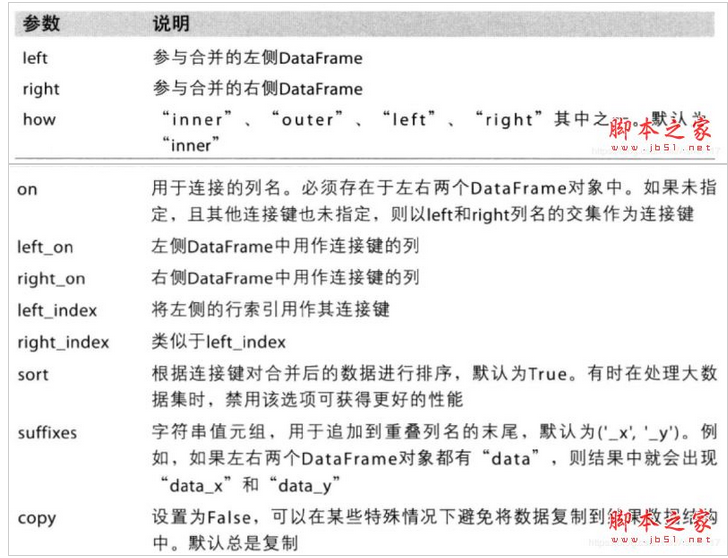
more：https://www.jb51.net/article/169334.htm
* Python中merge，join，concat区别和用法介绍：<br>
转载：https://blog.csdn.net/Yaroo/article/details/84752644<br>
* Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。<br>
  注意：该方法只能删除开头或是结尾的字符，不能删除中间部分的字符。<br>
  more：https://www.cnblogs.com/basilguo/p/python_regex_trim.html<br>
* python中select函数：https://www.cnblogs.com/huchong/p/8613308.html
* np.ceil(a) ，np.floor(a) : 计算各元素的ceiling 值， floor值（ceiling向上取整，floor向下取整）
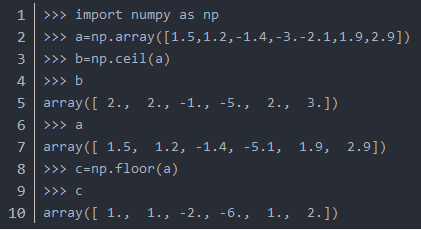

* 数组填充np.pad(array, pad_width, mode, **kwargs)函数:在卷积神经网络中，为了避免因为卷积运算导致输出图像缩小和图像边缘信息丢失，常常采用图像边缘填充技术，即在图像四周边缘填充0，使得卷积运算后图像大小不会缩小，同时也不会丢失边缘和角落的信息。<br>
  * 参数：<br>
    array——表示需要填充的数组；<br>
    pad_width——表示每个轴（axis）边缘需要填充的数值数目。<br>
    参数输入方式为：（(before_1, after_1), … (before_N, after_N)），其中(before_1, after_1)表示第1轴两边缘分别填充before_1个和after_1个数值。取值为：{sequence, array_like, int}<br>
    mode——表示填充的方式（取值：str字符串或用户提供的函数）,总共有11种填充模式；<br>
   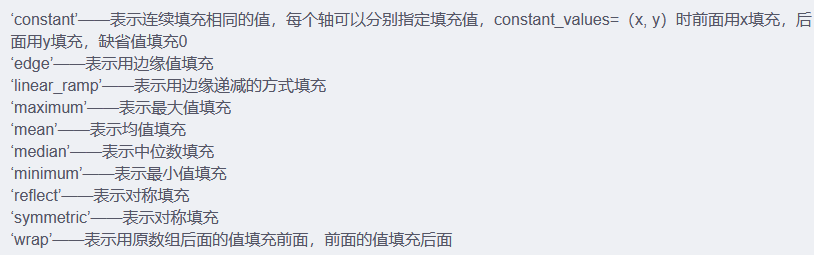<br>
  转载：https://blog.csdn.net/zenghaitao0128/article/details/78713663

* numpy中的transpose函数使用方法：就相当于数学中的转置，在矩阵中，转置就是把行与列相互调换位置；<br>
more:https://www.cnblogs.com/caizhou520/p/11227986.html

* Pandas中loc和iloc函数用法详解:<br>
  * loc函数：通过行索引 “Index” 中的具体值来取行数据（如取”Index”为”A”的行）<br>
  * iloc函数：通过行号来取行数据（如取第二行的数据）<br>
  more:http://www.dataquaner.cn/wordpress/archives/436

# Question:
1.min_event_gap？<br>
2.mask_window = int(mask_window * config.sampling_rate)<br>？mask window是什么？
3.std_data[std_data == 0] = 1?理解数据标准化操作！<br>
4.def adjust_missingchannels(self, data)这一函数的意义？<br>

In [ ]:
sample = np.zeros(self.X_shape)
        if np.random.random() < 0.95:
          data = np.copy(meta['data'])
          itp = meta['itp']
          its = meta['its']
          start_tp = itp

          shift = np.random.randint(-(self.X_shape[0]-self.mask_window), min([its-start_tp, self.X_shape[0]])-self.mask_window)
          sample[:, :, :] = data[start_tp+shift:start_tp+self.X_shape[0]+shift, np.newaxis, :]
          itp_list = [itp-start_tp-shift]
          its_list = [its-start_tp-shift]
        else:
          sample[:, :, :] = np.copy(meta['data'][start_tp-self.X_shape[0]:start_tp, np.newaxis, :])
          itp_list = []
          its_list = []

5.上段代码的作用？  初至时间、漂移

In [ ]:
target = np.zeros(self.Y_shape) #预测概率？
        for itp, its in zip(itp_list, its_list):
          if (itp >= target.shape[0]) or (itp < 0):
            pass
          elif (itp-self.mask_window//2 >= 0) and (itp-self.mask_window//2 < target.shape[0]):
            target[itp-self.mask_window//2:itp+self.mask_window//2, 0, 1] = \
                np.exp(-(np.arange(-self.mask_window//2,self.mask_window//2))**2/(2*(self.mask_window//4)**2))[:target.shape[0]-(itp-self.mask_window//2)]
          elif (itp-self.mask_window//2 < target.shape[0]):
            target[0:itp+self.mask_window//2, 0, 1] = \
                 np.exp(-(np.arange(0,itp+self.mask_window//2)-itp)**2/(2*(self.mask_window//4)**2))[:target.shape[0]-(itp-self.mask_window//2)]
          if (its >= target.shape[0]) or (its < 0):
            pass
          elif (its-self.mask_window//2 >= 0) and (its-self.mask_window//2 < target.shape[0]):
            target[its-self.mask_window//2:its+self.mask_window//2, 0, 2] = \
                np.exp(-(np.arange(-self.mask_window//2,self.mask_window//2))**2/(2*(self.mask_window//4)**2))[:target.shape[0]-(its-self.mask_window//2)]
          elif (its-self.mask_window//2 < target.shape[0]):
            target[0:its+self.mask_window//2, 0, 2] = \
                np.exp(-(np.arange(0,its+self.mask_window//2)-its)**2/(2*(self.mask_window//4)**2))[:target.shape[0]-(its-self.mask_window//2)]
        target[:, :, 0] = 1 - target[:, :, 1] - target[:, :, 2]


6.上段代码的作用？self.mask_window//2？

In [ ]:
class DataReader_mseed(DataReader):
.......
def read_mseed(self, fp, channels):

    meta = obspy.read(fp)
    meta = meta.detrend('constant')
    meta = meta.merge(fill_value=0)
    meta = meta.trim(min([st.stats.starttime for st in meta]), 
                     max([st.stats.endtime for st in meta]), 
                     pad=True, fill_value=0)
    nt = len(meta[0].data)

7.这一段代码什么作用？不是很理解，需要进一步解读哦！